In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Lecture des données
nomvar = np.loadtxt("Vent.csv", delimiter=",", dtype="str", max_rows=1)[1:]
X = np.loadtxt("Vent.csv", delimiter=",", skiprows=1, usecols=1 + np.arange(len(nomvar)))
y = np.loadtxt("Vagues.csv", delimiter=",", skiprows=1, usecols=1)

# Mise au carré du vent (H ≈ V²)
X = X ** 2

# Échantillonnage aléatoire de 1000 individus
np.random.seed(24102963)
n = len(y)
select = np.random.choice(n, size=1000, replace=False)
X = X[select, :]
y = y[select]

# Standardisation
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(f"X shape : {X.shape}")
print(f"y shape : {y.shape}")


X shape : (1000, 2000)
y shape : (1000,)


 Meilleur alpha (min MSE CV) : 100.0


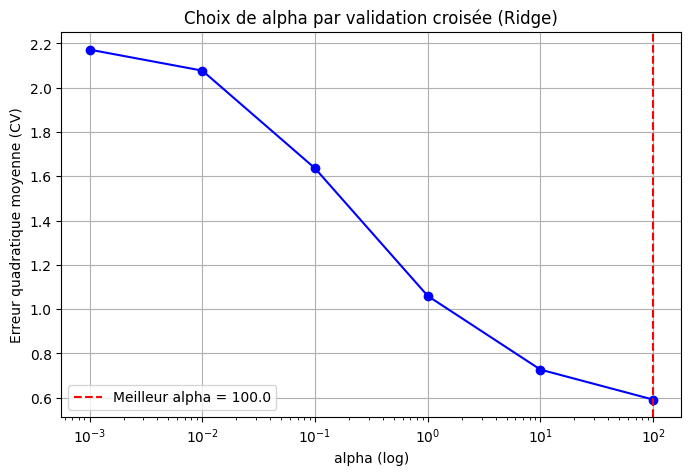

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Grille de valeurs pour alpha (log-échelonnée)
alphas = 10.**np.linspace(-3, 2, 6)  # [0.001, 0.01, 0.1, 1, 10, 100]
mse_cv = np.zeros(len(alphas))

# Validation croisée pour chaque alpha
for j, alpha in enumerate(alphas):
    model = Ridge(alpha=alpha)
    scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
    mse_cv[j] = -np.mean(scores)  
# Affichage du meilleur alpha
best_alpha = alphas[np.argmin(mse_cv)]
print(f" Meilleur alpha (min MSE CV) : {best_alpha}")

# Tracé
plt.figure(figsize=(8, 5))
plt.semilogx(alphas, mse_cv, 'o-', color='blue')
plt.axvline(best_alpha, color='red', linestyle='--', label=f"Meilleur alpha = {best_alpha}")
plt.xlabel("alpha (log)")
plt.ylabel("Erreur quadratique moyenne (CV)")
plt.title("Choix de alpha par validation croisée (Ridge)")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.265e-01, tolerance: 1.233e-01
  model = cd_fast.enet_coordinate_descent(


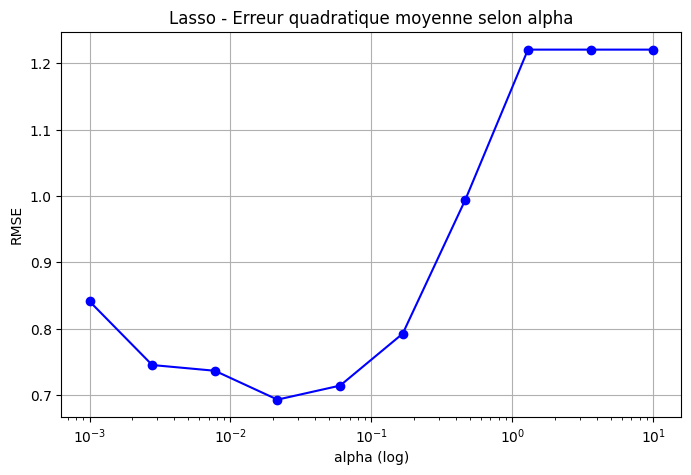

In [5]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Séparation en entraînement
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Grille d'alphas testés
alphas = 10.**np.linspace(-3, 1, 10)
rmse_list = []
n_nonzero_list = []

# Boucle Lasso
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_list.append(rmse)

# Tracé RMSE vs alpha
plt.figure(figsize=(8, 5))
plt.semilogx(alphas, rmse_list, 'b-o')
plt.xlabel("alpha (log)")
plt.ylabel("RMSE")
plt.title("Lasso - Erreur quadratique moyenne selon alpha")
plt.grid(True)
plt.show()




 Évaluation du modèle linéaire  :
RMSE : 1.438
R²   : -0.387


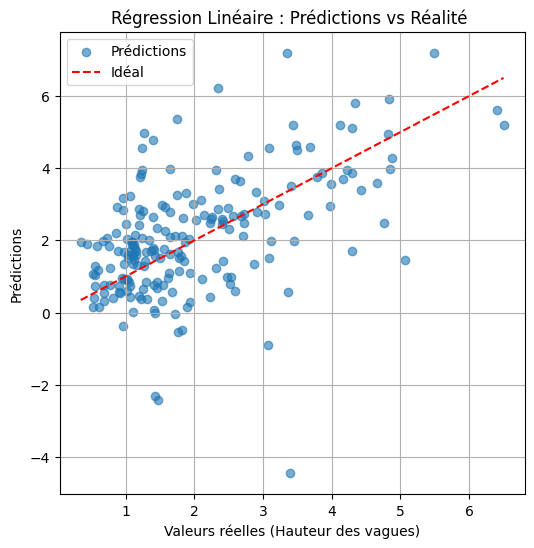

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Séparation entraînement 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions sur les données 
y_pred = model.predict(X_test)

# Évaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(" Évaluation du modèle linéaire  :")
print(f"RMSE : {rmse:.3f}")
print(f"R²   : {r2:.3f}")

# Tracé : Prédictions vs Réalité
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label="Prédictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Idéal")
plt.xlabel("Valeurs réelles (Hauteur des vagues)")
plt.ylabel("Prédictions")
plt.title("Régression Linéaire : Prédictions vs Réalité ")
plt.legend()
plt.grid(True)
plt.show()


Ridge (alpha=100) ➤ RMSE = 0.757 | R² = 0.615


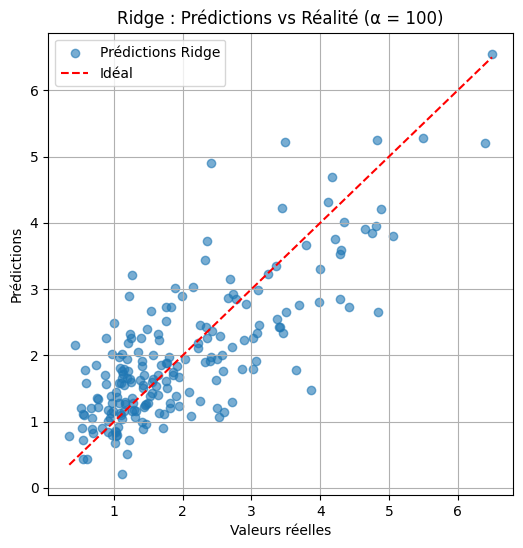

In [7]:

from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

alpha = 100 
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Évaluation
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge (alpha={alpha}) ➤ RMSE = {rmse_ridge:.3f} | R² = {r2_ridge:.3f}")

# Graphe
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.6, label="Prédictions Ridge")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Idéal")
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title(f"Ridge : Prédictions vs Réalité (α = {alpha})")
plt.legend()
plt.grid(True)
plt.show()


Lasso (alpha=0.1) ➤ RMSE = 0.744 | R² = 0.628 | Coeffs ≠ 0 : 28


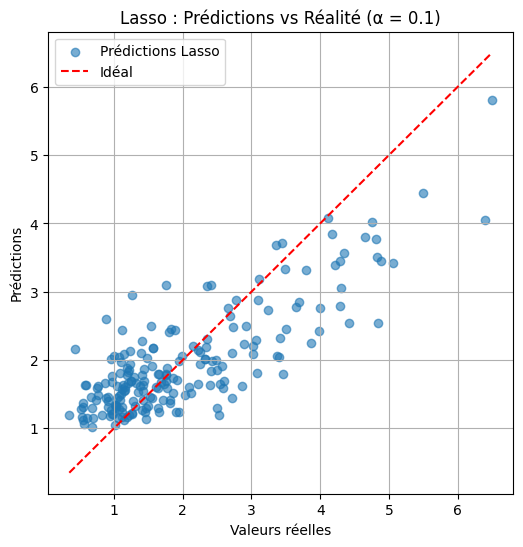

In [9]:
from sklearn.linear_model import Lasso

alpha = 0.1  
lasso = Lasso(alpha=alpha, max_iter=10000)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Évaluation
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)
n_nonzero = np.sum(np.abs(lasso.coef_) > 1e-6)
print(f"Lasso (alpha={alpha}) ➤ RMSE = {rmse_lasso:.3f} | R² = {r2_lasso:.3f} | Coeffs ≠ 0 : {n_nonzero}")

# Graphe
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.6, label="Prédictions Lasso")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Idéal")
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title(f"Lasso : Prédictions vs Réalité (α = {alpha})")
plt.legend()
plt.grid(True)
plt.show()
